# Covid19 Data Analysis

Data kasus covid19 seperti total kasus,total kematian,total kasus baru dan variabel lainnya bisa diakses via API (read : 'https://covid-19-apis.postman.com/')

## Get Data

In [56]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
url = 'https://api.covid19api.com/'
r = requests.get(url)
data = json.loads(r.text)

In [19]:
url = 'https://api.covid19api.com/summary'
r = requests.get(url)
dataSummary = json.loads(r.text)

In [96]:
url = 'https://api.covid19api.com/countries'
r = requests.get(url)
dataCountries = json.loads(r.text)

In [100]:
url = 'https://api.covid19api.com/dayone/country/south-africa/status/confirmed'
r = requests.get(url)
dataStatusConfirmed = json.loads(r.text)

In [111]:
url = 'https://covid-api.com/api/reports?date=2020-03-14&q=China%20Beijing&iso=CHN&region_name=China&region_province=Beijing'
r = requests.get(url)
dataPerCity = json.loads(r.text)

In [110]:
url = 'https://covid-api.com/api/reports/total?date=2020-04-15'
r = requests.get(url)
dataPerDay = json.loads(r.text)

In [116]:
dataPerDay['data']

{'date': '2020-04-15',
 'last_update': '2020-04-15 23:04:26',
 'confirmed': 2056055,
 'confirmed_diff': 79863,
 'deaths': 134177,
 'deaths_diff': 8193,
 'recovered': 511019,
 'recovered_diff': 36758,
 'active': 1410859,
 'active_diff': 34912,
 'fatality_rate': 0.0653}

## Data Cleaning
Data Cleaning berfungsi untuk mengubah format data sesuai dengan keinginan kita (biasanya dalam bentuk dataframe atau tabel). 

In [93]:
def getDataCasesGlobal():
    data = []
    url = 'https://api.covid19api.com/summary'
    r = requests.get(url)
    dataSummary = json.loads(r.text)
    var = list(dataSummary['Global'])
    
    for k in range(len(var)):
        data.append(dataSummary['Global'][var[k]])
        
    df = pd.concat([pd.DataFrame(var),pd.DataFrame(data)],axis=1,ignore_index=True)
    df.columns = ['Variable','Total']
        
    return df

In [48]:
def getDataCasesByCountry():
    data = []
    url = 'https://api.covid19api.com/summary'
    r = requests.get(url)
    dataSummary = json.loads(r.text)
    
    for k in range(len(dataSummary['Countries'])):
        data.append(dataSummary['Countries'][k])
        
    return pd.DataFrame(data)

In [117]:
dataCasesByCountry = getDataCasesByCountry()
dataCasesByCountry.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,AF,afghanistan,39,37054,5,1312,57,25960,2020-08-09T23:58:11Z,{}
1,Albania,AL,albania,124,6275,4,193,41,3268,2020-08-09T23:58:11Z,{}
2,Algeria,DZ,algeria,538,34693,11,1293,416,24083,2020-08-09T23:58:11Z,{}
3,Andorra,AD,andorra,0,955,0,52,0,839,2020-08-09T23:58:11Z,{}
4,Angola,AO,angola,34,1572,3,70,20,564,2020-08-09T23:58:11Z,{}


In [118]:
dataCasesGlobal = getDataCasesGlobal()
dataCasesGlobal.head()

,Variable,Total
0,NewConfirmed,259470
1,TotalConfirmed,19636772
2,NewDeaths,5457
3,TotalDeaths,726765
4,NewRecovered,201182


# Exploratory Data Analysis (EDA)
EDA berfungsi untuk mendapatkan informasi sesuai dengan keinginan kita. Dalam kasus ini, insight yang akan kita cari adalah
1. Negara Paling Banyak Terkena Kasus Covid 19
2. Negara Paling Sedikit Terkena Kasus Covid 19
3. Negara-Negara yang memiliki terkena dampak yang mirip

### 1. Total Kasus paling banyak

In [119]:
dataCasesByCountry.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,AF,afghanistan,39,37054,5,1312,57,25960,2020-08-09T23:58:11Z,{}
1,Albania,AL,albania,124,6275,4,193,41,3268,2020-08-09T23:58:11Z,{}
2,Algeria,DZ,algeria,538,34693,11,1293,416,24083,2020-08-09T23:58:11Z,{}
3,Andorra,AD,andorra,0,955,0,52,0,839,2020-08-09T23:58:11Z,{}
4,Angola,AO,angola,34,1572,3,70,20,564,2020-08-09T23:58:11Z,{}


In [121]:
sort_values = dataCasesByCountry.sort_values(by=['TotalConfirmed'],ascending=False)

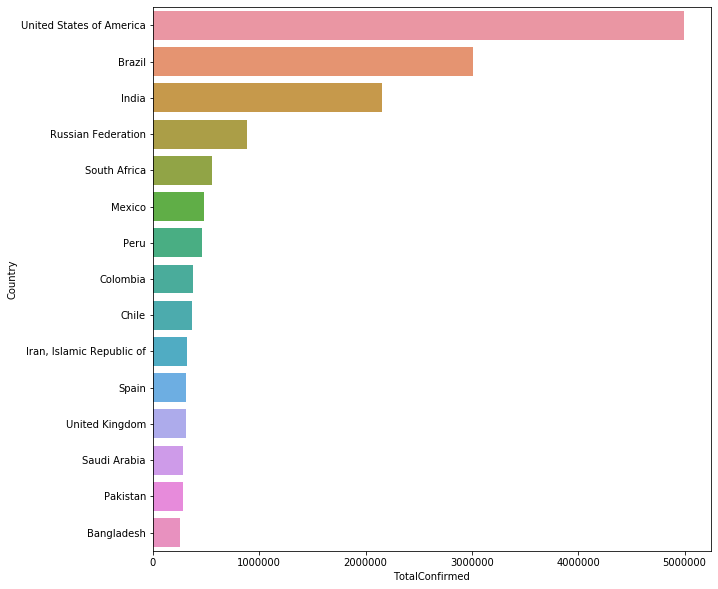

In [133]:
plt.figure(figsize=(10,10))
sns.barplot(x='TotalConfirmed', y='Country',data=sort_values.iloc[:15,:])
plt.show()

### 2. Total Kasus paling sedikit

In [128]:
sort_values_asc = dataCasesByCountry.sort_values(by=['TotalConfirmed'],ascending=True)

In [130]:
sort_values_asc

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
182,Western Sahara,EH,western-sahara,0,10,0,1,0,8,2020-08-09T23:58:11Z,{}
72,Holy See (Vatican City State),VA,holy-see-vatican-city-state,0,12,0,0,0,12,2020-08-09T23:58:11Z,{}
140,Saint Kitts and Nevis,KN,saint-kitts-and-nevis,0,17,0,0,0,16,2020-08-09T23:58:11Z,{}
48,Dominica,DM,dominica,0,18,0,0,0,18,2020-08-09T23:58:11Z,{}
91,Lao PDR,LA,lao-pdr,0,20,0,0,0,19,2020-08-09T23:58:11Z,{}
...,...,...,...,...,...,...,...,...,...,...,...
154,South Africa,ZA,south-africa,7712,553188,301,10210,9809,404568,2020-08-09T23:58:11Z,{}
138,Russian Federation,RU,russia,5185,880563,129,14827,6578,688856,2020-08-09T23:58:11Z,{}
76,India,IN,india,64399,2153010,861,43379,53879,1480884,2020-08-09T23:58:11Z,{}
23,Brazil,BR,brazil,49970,3012412,905,100477,49238,2321537,2020-08-09T23:58:11Z,{}


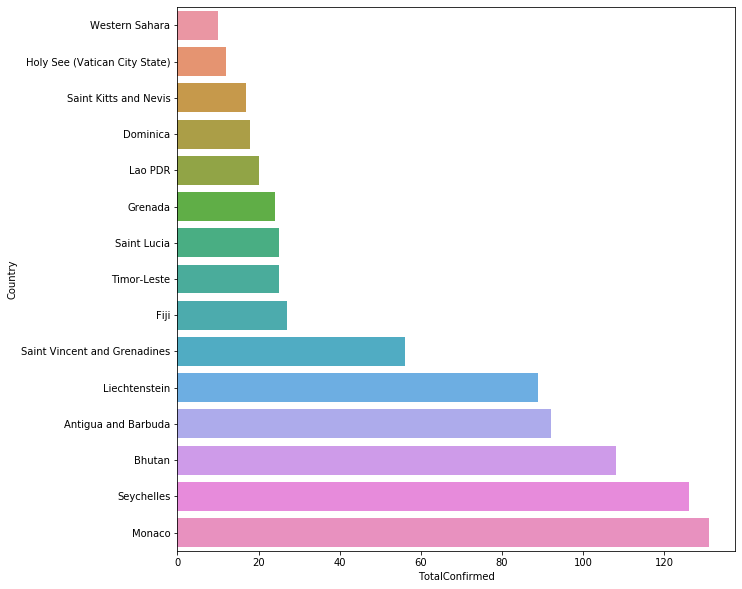

In [134]:
plt.figure(figsize=(10,10))
sns.barplot(x='TotalConfirmed', y='Country',data=sort_values_asc.iloc[:15,:])
plt.show()

### 3. Negara-Negara yang memiliki terkena dampak yang mirip

In [136]:
from sklearn.cluster import KMeans
import numpy as np

In [137]:
dataCasesByCountry.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,AF,afghanistan,39,37054,5,1312,57,25960,2020-08-09T23:58:11Z,{}
1,Albania,AL,albania,124,6275,4,193,41,3268,2020-08-09T23:58:11Z,{}
2,Algeria,DZ,algeria,538,34693,11,1293,416,24083,2020-08-09T23:58:11Z,{}
3,Andorra,AD,andorra,0,955,0,52,0,839,2020-08-09T23:58:11Z,{}
4,Angola,AO,angola,34,1572,3,70,20,564,2020-08-09T23:58:11Z,{}


In [183]:
X = dataCasesByCountry[['NewConfirmed','TotalConfirmed','NewDeaths','TotalDeaths','NewRecovered','TotalRecovered']]
X = np.array(X)

In [150]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [168]:
classify = pd.concat([dataCasesByCountry,pd.DataFrame(kmeans.labels_)]
                     ,axis=1,ignore_index=True)
classify.columns = dataCasesByCountry.columns.values.tolist() + ['Class']

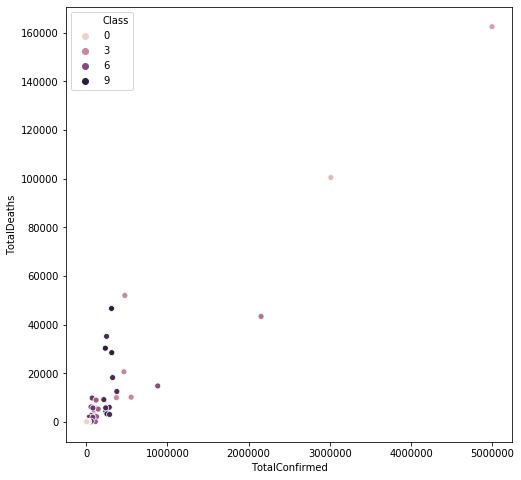

In [175]:
plt.figure(figsize=(8,8))
sns.scatterplot('TotalConfirmed','TotalDeaths',hue='Class',data=classify)
plt.show()

In [177]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

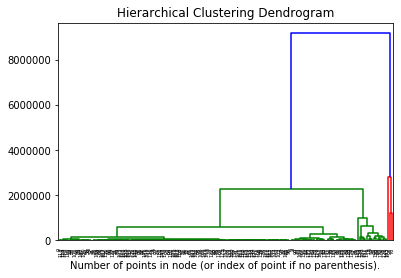

In [190]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

X = dataCasesByCountry[['NewConfirmed','TotalConfirmed','NewDeaths','TotalDeaths','NewRecovered','TotalRecovered']]
X = np.array(X)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

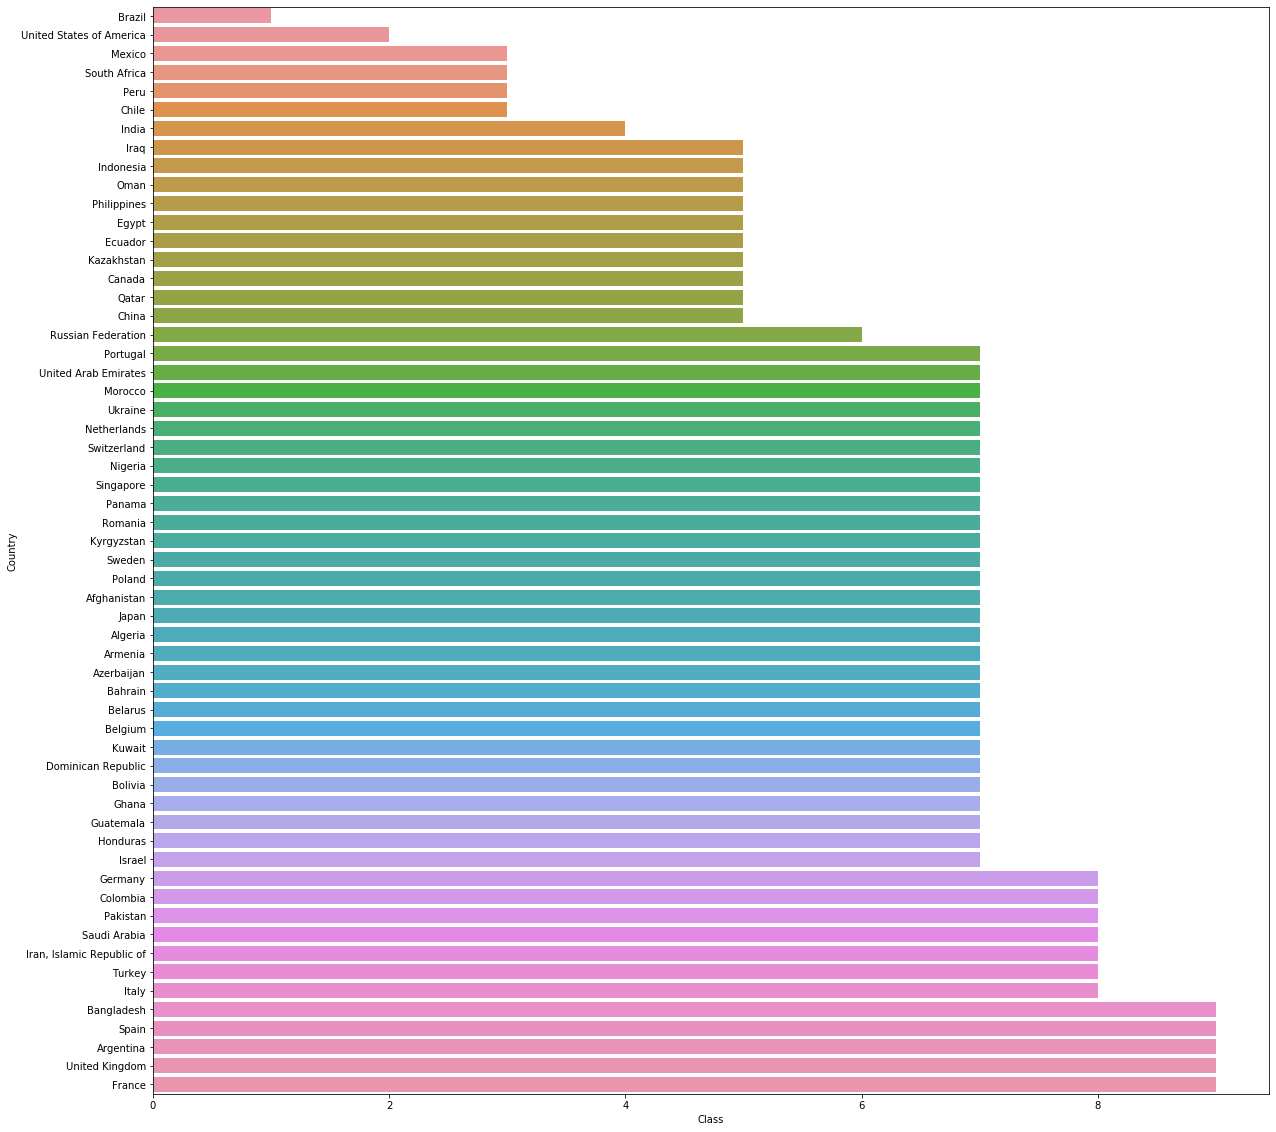

In [204]:
Cat = classify[['Country','Class']]
Cat = Cat[Cat['Class']!=0]
plt.figure(figsize=(20,20))
sns.barplot(x = 'Class',y = 'Country',data = Cat.sort_values(by=['Class'],ascending=True))

# Refference
1. https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest#00030720-fae3-4c72-8aea-ad01ba17adf8